In [2]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, cross_validate
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset 
data = pd.read_csv(r'C:\Users\iness\OneDrive\Ambiente de Trabalho\FAA_1\diabetes.csv')

# Pré-processing
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)
data.fillna(data.median(), inplace=True)

# Separate the independent (X) and dependent (y) variables
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Separation between training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Otimization with RandomizedSearch 
param_dist = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
random_search = RandomizedSearchCV(SVC(), param_distributions=param_dist, n_iter=10, cv=3, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)
best_model_svm = random_search.best_estimator_
y_pred_optimized = best_model_svm.predict(X_test)

# Ranking report for the optimized model
report_optimized = classification_report(y_test, y_pred_optimized, output_dict=True)
accuracy_svm_optimized = accuracy_score(y_test, y_pred_optimized)

<Figure size 800x600 with 0 Axes>

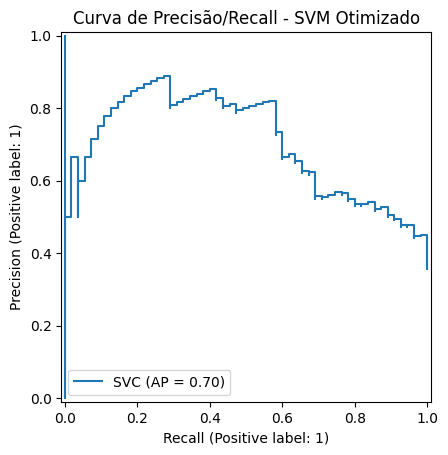

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

# Visualize Precision/Recall Curve
plt.figure(figsize=(8, 6))
PrecisionRecallDisplay.from_estimator(best_model_svm, X_test, y_test)
plt.title('Curva de Precisão/Recall - SVM Otimizado')
plt.show()


<module 'matplotlib.pyplot' from 'c:\\Users\\iness\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\matplotlib\\pyplot.py'>

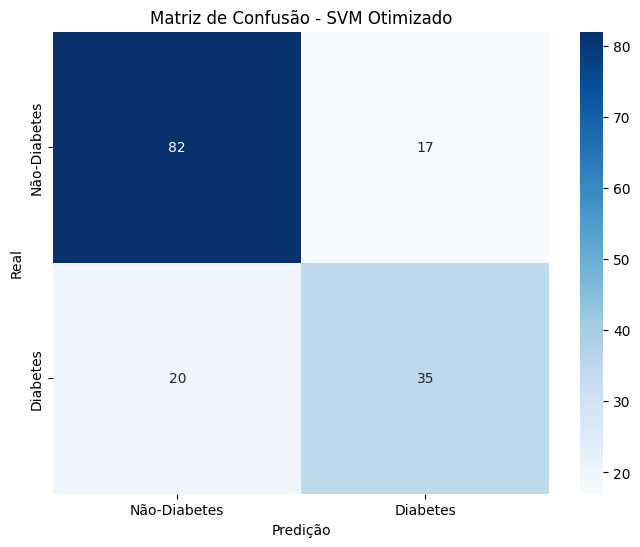

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_optimized)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Não-Diabetes', 'Diabetes'], yticklabels=['Não-Diabetes', 'Diabetes'])
plt.title("Matriz de Confusão - SVM Otimizado")
plt.xlabel('Predição')
plt.ylabel('Real')
plt


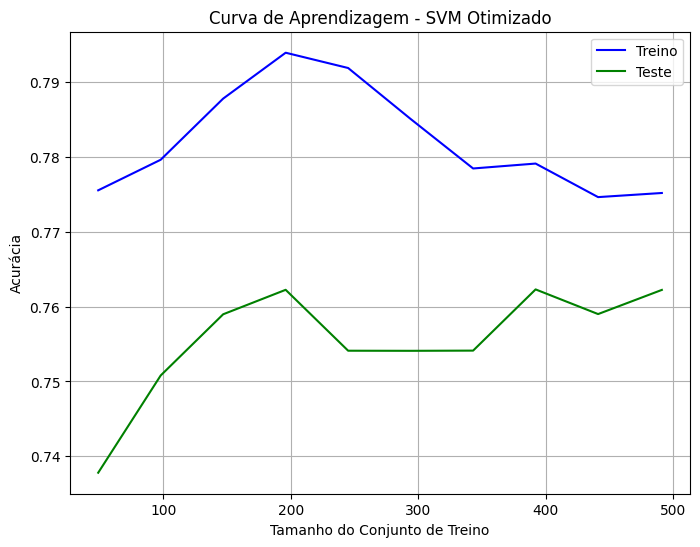

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    best_model_svm, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Treino', color='blue')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Teste', color='green')
plt.title("Curva de Aprendizagem - SVM Otimizado")
plt.xlabel("Tamanho do Conjunto de Treino")
plt.ylabel("Acurácia")
plt.legend()
plt.grid(True)
plt.show()



Acurácia média da validação cruzada: 0.7541
Desvio padrão da acurácia: 0.0224


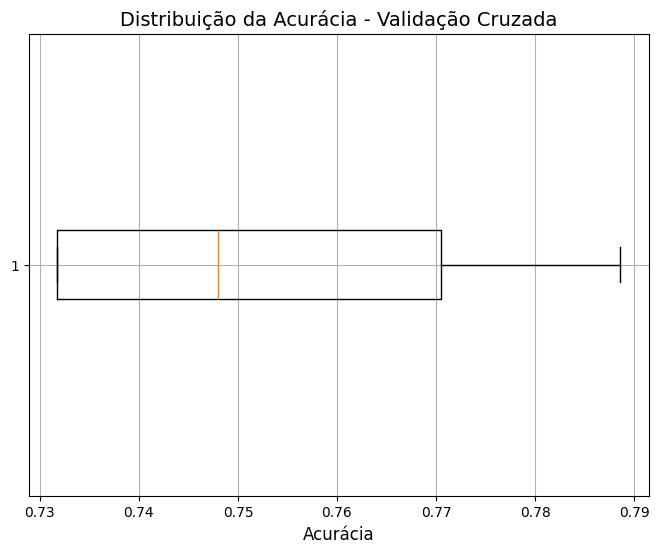

In [ ]:
# Cross validation to calculate accuracies
cv_scores = cross_val_score(best_model_svm, X_train, y_train, cv=5, scoring='accuracy')

# Display the average accuracy and standard deviation
print(f"Acurácia média da validação cruzada: {cv_scores.mean():.4f}")
print(f"Desvio padrão da acurácia: {cv_scores.std():.4f}")

# Boxplot graph for accuracy distribution - Cross Validation
plt.figure(figsize=(8, 6))
plt.boxplot(cv_scores, vert=False)  
plt.title('Distribuição da Acurácia - Validação Cruzada', fontsize=14)
plt.xlabel('Acurácia', fontsize=12)
plt.grid(True)
plt.show()


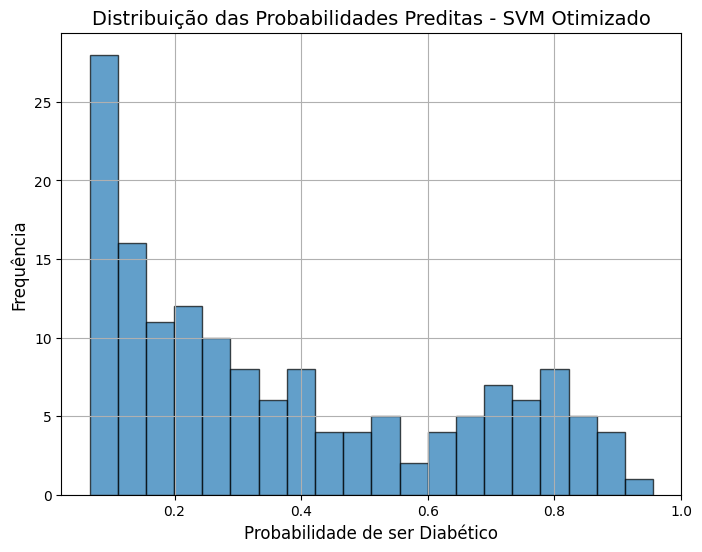

In [ ]:
# Get predicted odds
y_prob = best_model_svm.predict_proba(X_test)[:, 1]  

plt.figure(figsize=(8, 6))
plt.hist(y_prob, bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribuição das Probabilidades Preditas - SVM Otimizado', fontsize=14)
plt.xlabel('Probabilidade de ser Diabético', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(True)
plt.show()


